In [1]:
import os
import numpy as np

import calibpy.calibration as calib

SCREEN_WH = (1920, 1080)

In [2]:
# Split video into image frames
notebook_path = os.path.dirname(os.path.realpath('__file__'))
video_path = os.path.join(notebook_path, '..', 'res/checkerboard.mp4')
frames = calib.convert_video_to_frames(video_path, frame_rate=50, save_imgs=False)
print(len(frames))

179


In [ ]:
# Display first frame
calib.display_image(frames[0], SCREEN_WH)

In [3]:
# Select initial tracking points (minimum of 4 if later DLT) and track them across frames
points_frames = calib.track_points_seq(frames, SCREEN_WH)

In [ ]:
# Save to video & display tracked points accross frames
track_video_path = os.path.join(notebook_path, '..', 'res/checkerboard_track.mp4')
calib.convert_frames_to_video(track_video_path, frames, points_frames)
calib.display_video(track_video_path, SCREEN_WH)

In [ ]:
# Estimate homography 1st frame
board_points = calib.generate_homogeneous_board_points()
H_0 = calib.estimate_homography(points_frames[0], board_points)

In [ ]:
# Reproject checkerboard points and calculate XY pixel error 1st frame
new_image_points = np.matmul(H_0, board_points.T).T
new_image_points = new_image_points[:, 0:2] / new_image_points[:, 2:3]
proj_err = np.mean(np.abs(new_image_points-points_frames[0]), axis=0)
print(proj_err)

In [4]:
# Estimate homography from video points to projected image dimensions
proj_image_path = os.path.join(notebook_path, '..', 'res/portal.png')
proj_image = calib.read_image(proj_image_path)
image_dims = tuple(proj_image.shape[0:2][::-1])
image_coords = calib.generate_eqspaced_image_points(image_dims[0], image_dims[1])
homogeneous_points_frame = np.hstack((points_frames[0], np.ones((points_frames[0].shape[0], 1))))
Hproj_0 = calib.estimate_homography(image_coords, homogeneous_points_frame)

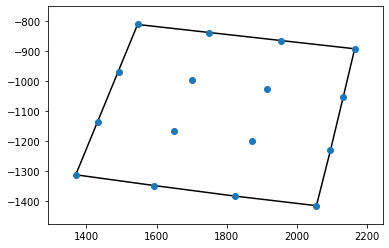

In [5]:
# Project image into square region of tracked points 1st frame
int_points = calib.calculate_interior_points(points_frames[0], plot_hull=True)

In [8]:
int_points.shape

(348270, 2)